# WEEK 8: Concepts of MLE and Logistic regression

### Maximum Likelihood Estimation

Can be applied to models with any probability distribution and choose the βo, β1 and σ that maximises the likelihood function.

In [ ]:
import numpy as np
from scipy.optimize import minimize
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

Example 1:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MLE.xlsx to MLE.xlsx


In [ ]:
tbl = pd.read_excel('MLE.xlsx')
tbl

,Id,Y,X
0,1,2,1
1,2,6,4
2,3,7,5
3,4,9,6
4,5,15,9


In [ ]:
#using least squares method
#x is independent variable and y is dependent variable
import statsmodels.api as sm
x = tbl['X']
y = tbl['Y']
x2 = sm.add_constant(x)
modl = sm.OLS(y, x2)
modl2 = modl.fit()
print(modl2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     145.9
Date:                Sun, 26 Mar 2023   Prob (F-statistic):            0.00122
Time:                        08:53:56   Log-Likelihood:                -4.5811
No. Observations:                   5   AIC:                             13.16
Df Residuals:                       3   BIC:                             12.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2882      0.755     -0.382      0.7

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Linear regression equation becomes $$y = -0.2882 + 1.6176x$$ where x is independent variable and y is dependent variable. So βo = -0.2882 and β1 = 1.6176

In [ ]:
#using MLE method
#parameter estimation by MLE
#standard deviation of error
e = modl2.resid
np.std(e) #sigma

0.6048820983804829

In [ ]:
def lik(parameters):
  m = parameters[0]
  b = parameters[1]
  sigma = parameters[2]
  for i in np.arange(0, len(x)):
    y_exp = m*x+b
  l = (len(x)/2 * np.log(2*np.pi) * len(x)/2 * np.log(sigma**2) + 1/(2*sigma**2)*sum((y-y_exp)**2))
  return l

x = np.array([1, 4, 5, 6, 9])
y = np.array([2, 6, 7, 9, 15])
lik_model = minimize(lik, np.array([2, 2, 2]), method='L-BFGS-B')

lik_model
#first two values of x give slope and intercept respectively

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -17.578665889890743
        x: [ 1.618e+00 -2.882e-01 -2.822e-01]
      nit: 19
      jac: [ 2.540e-04  5.400e-05  2.640e-04]
     nfev: 112
     njev: 28
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

Example 2:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving regcar.xlsx to regcar.xlsx


In [ ]:
tbl2 = pd.read_excel('regcar.xlsx')
tbl2

,TV Ads,car Sold
0,1,14
1,3,24
2,2,18
3,1,17
4,3,27


In [ ]:
#using least squares method
#x is independent variable and y is dependent variable
x = tbl2['TV Ads']
y = tbl2['car Sold']
x2 = sm.add_constant(x)
modl = sm.OLS(y, x2)
modl2 = modl.fit()
print(modl2.summary())

                            OLS Regression Results                            
Dep. Variable:               car Sold   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Sun, 26 Mar 2023   Prob (F-statistic):             0.0190
Time:                        09:09:00   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000      2.366      4.226      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Linear regression equation becomes $$y = 10 + 5x$$ where x is independent variable and y is dependent variable

In [ ]:
#using MLE method
#parameter estimation by MLE
#standard deviation of error
e = modl2.resid
np.std(e) #sigma

1.6733200530681507

In [ ]:
x = np.array([1, 3, 2, 1, 3])
y = np.array([14, 24, 18, 17, 27])
lik_model = minimize(lik, np.array([2, 2, 2]), method='Nelder-Mead')

lik_model
#first two values of x give slope and intercept respectively

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 5.797555042750809
             x: [ 5.000e+00  1.000e+01 -7.806e-01]
           nit: 107
          nfev: 199
 final_simplex: (array([[ 5.000e+00,  1.000e+01, -7.806e-01],
                       [ 5.000e+00,  1.000e+01, -7.806e-01],
                       [ 5.000e+00,  1.000e+01, -7.807e-01],
                       [ 5.000e+00,  1.000e+01, -7.806e-01]]), array([ 5.798e+00,  5.798e+00,  5.798e+00,  5.798e+00]))

### Logistic Regression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Simmons.xls to Simmons.xls


In [ ]:
df = pd.read_excel('Simmons.xls')
df

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0
...,...,...,...,...
95,96,3.318,0,0
96,97,2.421,1,0
97,98,6.073,0,0
98,99,2.630,1,0


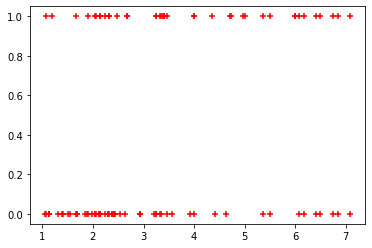

In [ ]:
plt.scatter(df.Spending, df.Coupon, marker='+', color='red')

In [ ]:
x = df[['Card', 'Spending']]
y = df['Coupon']

x1 = sm.add_constant(x)
logit_model = sm.Logit(y, x1)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.101    
Dependent Variable: Coupon           AIC:              126.9739 
Date:               2023-03-26 09:56 BIC:              134.7894 
No. Observations:   100              Log-Likelihood:   -60.487  
Df Model:           2                LL-Null:          -67.301  
Df Residuals:       97               LLR p-value:      0.0010981
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     5.0000                                      
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
const        -2.1464    0.5772  -3.7183  0.0002  -3.2778  -1.0150
Card          1.0987    0.4447   2.4707  0.0135   0.2271   1.9703
Spending

βo = -2.1464, β1 = 0.3416 (coefficient of x1) and β2 = 1.0987 (coefficient of x2). Also in this the G-statistic is equal to 13.628 and degrees of freedom is 2.

In [ ]:
#chi square value of G statistic is 
import scipy 
from scipy.stats import chi2
chi2.pdf(13.628, 2)

0.000549145469075383